# 1. 业务理解 （Business Understanding）
## Backgroud
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.  
根据经验或事实，有一些群体确实更容易得救，比如女性 孩童或上层阶级。  
  
## Goal  
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable.  
总体目标是：预测泰坦尼克号乘客是否会得救  
  
## Metric  
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy".  
评分标准是**准确率**, 即 预测正确的人数(包括得救和不得救)/总人数  
    
## Submission File Format  
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.  
提交csv格式的文件，包含两列，PassengerId和Survied，1为得救，0为死亡
  
The file should have exactly 2 columns:    
PassengerId (sorted in any order)    
Survived (contains your binary predictions: 1 for survived, 0 for deceased  

# 2.数据理解（Data Understanding）
## 字段解释
  
|Variable |Definition |Key |  
|:-----------|:-----------|:-----------|  
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|  |
|Age|	Age  | in years	|
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	||
|fare	|Passenger fare	||
|cabin	|Cabin number|	|
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|
  
目标变量为 **survival**    
sibsp 为一同登船兄弟姐妹的数量  
parch 为一同登船的父母数量，有的是和奶奶一起，所以这个变量数值为0    
fare 票价  
cabin 船舱号   
embarked 上船地点  
   
## Variable Notes  
**pclass:** A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
  
**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5    
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch:** The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

# 3.数据准备（Data Preparation）

In [1]:
# 导入需要的包
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## 3.1 读取数据

In [2]:
data_all = pd.read_csv('./train.csv')
data_predict = pd.read_csv('./test.csv')

# 3.2 数据探索
数据类型  
缺失值 
异常值  
文本数据处理    
数据可视化  
数据分布  
数据相关性  
特征创造

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


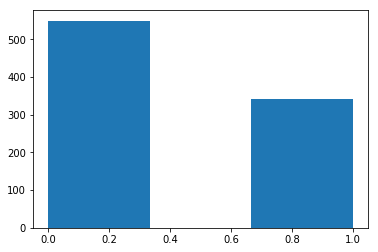

0    549
1    342
Name: Survived, dtype: int64

In [3]:
# 初探
data_all.head()
data_all.info()
data_all.describe()

plt.hist(data_all['Survived'], bins=3)
plt.show()
data_all['Survived'].value_counts()

1. 数据总量  
12个变量(包括目标变量,survived)，891行数据  
  
2. 数据类型  
float类型的变量有两个  
int类型的有两个  
object类型的有五个  
  
3. 目标变量分布  
342:549 ≈ 2:3  
尚可，最后建模的时候，不处理和处理平衡数据都试一下  
  
4. 缺失值   
可以看出来，cabin、age和Embarked存在缺失值，其中cabin最严重只有204个有值，缺失了687个；embarked只有2个缺失；  age缺失177个。  




In [4]:
# object类型数据处理，name,sex,ticekt,cabin,embarked
# name处理，提取称呼
Name = data_all['Name'] # 观察可以发现，称呼都是在第一个逗号后
Name_split = Name.str.split(",",1).str[1] # 句号后的不要
Name_split2 =  Name_split.str.split(".",1).str[0]
print(Name_split2.value_counts())
# 删除原有的name，用新的称呼替代，并用one-hot编码
data_all_pre = data_all.drop(['Name'],axis=1)
data_all_pre['call'] = Name_split2


'''
编码方法分为 pandas和sklearn两种
pandas默认只处理字符串类别变量，sklearn默认只处理数值型类别变量(需要先 LabelEncoder )
# pandas 方法
pd.get_dummies(prefix=)  
pandas的get_dummies()可以直接对变量进行one-hot编码，其中prefix是为one-hot编码后的变量进行命名。
'''
# pandas,get_dummies
Call_onehot = pd.get_dummies(data_all_pre['call'])
Call_onehot.head()
data_all_pre = data_all_pre.drop(['call'],axis=1)
data_all_pre[Call_onehot.columns] = Call_onehot[Call_onehot.columns]
print(data_all_pre.head())

'''
# sklearn方法
Call_values = np.array(data_all_pre['call'])
print(Call_values)
# 数字编码
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Call_values)
print(integer_encoded)
# one-hot 编码
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
'''

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Mme               1
 Jonkheer          1
 Don               1
 the Countess      1
 Ms                1
 Capt              1
 Lady              1
Name: Name, dtype: int64
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin      ...        Master   Miss   Mlle   Mme  \
0         A/5 21171   7.2500   NaN      ...             0      0      0     0   
1          PC 17599  71.2833   C85      ...             0      0      0

"\n# sklearn方法\nCall_values = np.array(data_all_pre['call'])\nprint(Call_values)\n# 数字编码\nlabel_encoder = LabelEncoder()\ninteger_encoded = label_encoder.fit_transform(Call_values)\nprint(integer_encoded)\n# one-hot 编码\nonehot_encoder = OneHotEncoder(sparse=False)\ninteger_encoded = integer_encoded.reshape(len(integer_encoded), 1)\nonehot_encoded = onehot_encoder.fit_transform(integer_encoded)\nprint(onehot_encoded)\n"

In [5]:
# sex的处理
data_all_pre['Sex'].value_counts() # 两类，直接赋予0和1即可
def sex_value(Sex):
    if Sex=='male':
        return 1
    else:
        return 0
data_all_pre['Sex']=data_all_pre['Sex'].apply(lambda x:sex_value(x))
print(data_all_pre.head())

# 处理ticket
## 看上去是没有啥规律的，但是是不是可以从数字的位数看下？这里暂时做删除处理
if 'Ticket' in data_all_pre.columns:
    data_all_pre = data_all_pre.drop(['Ticket'],axis=1)

# 处理cabin
'''
cabin存在177个缺失值；缺失值单独当做一类，为0
按经验应该有位置的差异区别的，但是数字不好判断，所以仅按A B C D区别，直接编码1,2,3..
'''

print(data_all_pre['Cabin'].value_counts())
Cabin_split = data_all_pre['Cabin'].str[0]
Cabin_split.value_counts()

map_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
Cabin_split = Cabin_split.map(map_dict)
data_all_pre['Cabin_label'] = Cabin_split
data_all_pre = data_all_pre.drop(['Cabin'],axis=1)
data_all_pre.head()


# 处理embarked, 三种地点，做one-hot处理
print(data_all_pre['Embarked'].value_counts())
Embarked_onehot = pd.get_dummies(data_all_pre['Embarked'])
Embarked_onehot.head()
data_all_pre = data_all_pre.drop(['Embarked'],axis=1)
data_all_pre[Embarked_onehot.columns] = Embarked_onehot[Embarked_onehot.columns]
data_all_pre.head()



   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    1  22.0      1      0         A/5 21171   
1            2         1       1    0  38.0      1      0          PC 17599   
2            3         1       3    0  26.0      0      0  STON/O2. 3101282   
3            4         1       1    0  35.0      1      0            113803   
4            5         0       3    1  35.0      0      0            373450   

      Fare Cabin      ...        Master   Miss   Mlle   Mme   Mr   Mrs   Ms  \
0   7.2500   NaN      ...             0      0      0     0    1     0    0   
1  71.2833   C85      ...             0      0      0     0    0     1    0   
2   7.9250   NaN      ...             0      1      0     0    0     0    0   
3  53.1000  C123      ...             0      0      0     0    0     1    0   
4   8.0500   NaN      ...             0      0      0     0    1     0    0   

    Rev   Sir   the Countess  
0     0     0      

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Capt,Col,...,Mr,Mrs,Ms,Rev,Sir,the Countess,Cabin_label,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,...,1,0,0,0,0,0,NaN,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0,...,0,1,0,0,0,0,3.0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,...,0,0,0,0,0,0,NaN,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,...,0,1,0,0,0,0,3.0,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,...,1,0,0,0,0,0,NaN,0,0,1


In [6]:
# 处理缺失值
# 缺失值，cabin、age和Embarked存在缺失值，其中cabin最严重只有204个有值，缺失了687个；embarked只有2个缺失； age缺失177个。

## Embarked 不知道在one-hot中是否自动默认三个都是0？
data_all_pre[(data_all_pre['C']==0)&(data_all_pre['Q']==0)&(data_all_pre['S']==0)] #已经处理过，其实最好还是单独开一类？

## cabin的话，空值单独当一类，填充0
data_all_pre['Cabin_label'] = data_all_pre['Cabin_label'].replace(np.NaN,0.0)
data_all_pre.head()

## age的话，由于缺失值太多，暂时用中位数填充。
### 之后尝试用性别和class分组group的均值填充
data_all_pre['Age'] = data_all_pre['Age'].fillna(data_all_pre['Age'].median())
data_all_pre.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Capt,Col,...,Mr,Mrs,Ms,Rev,Sir,the Countess,Cabin_label,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,...,1,0,0,0,0,0,0.0,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0,...,0,1,0,0,0,0,3.0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,...,0,0,0,0,0,0,0.0,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,...,0,1,0,0,0,0,3.0,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,...,1,0,0,0,0,0,0.0,0,0,1


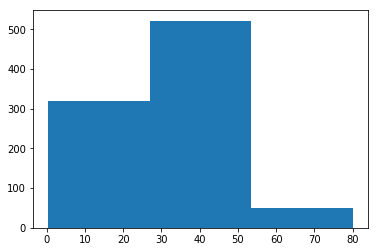

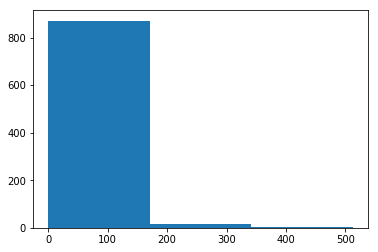

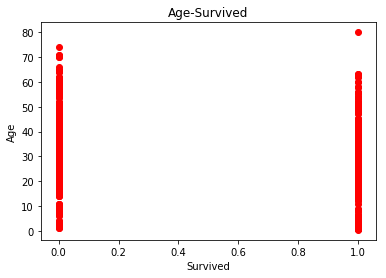

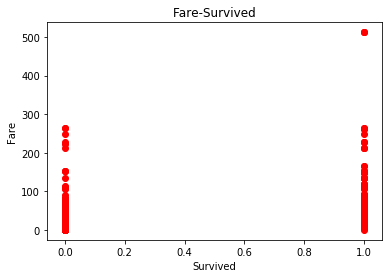

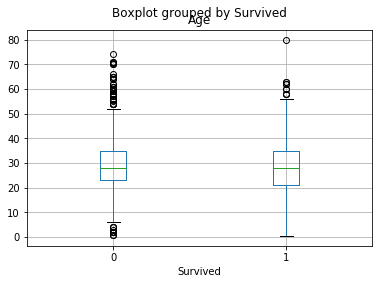

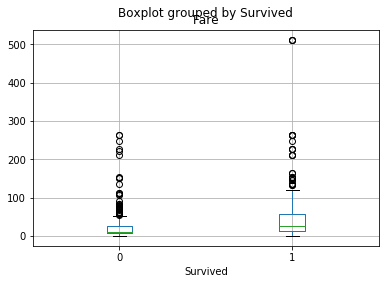

In [10]:
# 处理异常值
## 年龄和价格的分布

## 直方图
plt.hist(data_all_pre['Age'], bins=3)
plt.show()

plt.hist(data_all_pre['Fare'], bins=3)
plt.show()

## 散点图
x = data_all_pre['Survived']
y = data_all_pre['Age']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Age-Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
ax1.scatter(x,y,c = 'r',marker = 'o')

x = data_all_pre['Survived']
y = data_all_pre['Fare']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Fare-Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
ax1.scatter(x,y,c = 'r',marker = 'o')

## 箱型图
data_all_pre.boxplot(column='Age', by='Survived')
plt.show()
data_all_pre.boxplot(column='Fare', by='Survived')
plt.show()

# 4.建模（Modeling）& 5.评估（Evaluation）


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn import metrics
from sklearn.ensemble.forest import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
# 拆分数据集
Y = data_all_pre['Survived']
X = data_all_pre.drop('Survived', axis=1)

# 按7:3拆分成training和testing集，随机种子为2018。随机种子的目的是使每次拆分的结果一致
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=2018)

In [21]:
# 逻辑回归
pipe_lr = Pipeline([('scl',StandardScaler()),
                 ('clf',LogisticRegression(random_state =2018))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{
    'clf__C': param_range,
    'clf__penalty':['l1','l2'],
    'clf__solver':['liblinear'],
    'clf__max_iter':[10,50,100,150,200,300]}]

gs = GridSearchCV(estimator = pipe_lr,
                 param_grid = param_grid,
                 scoring = 'roc_auc',
                 cv = 5,
                 n_jobs = -1)
gs = gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_params_)

# 测试在testing上的效果
clf = gs.best_estimator_
clf.fit(X_test,Y_test)

print('测试集AUC:',metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:, 1]))

0.8602407877064824
{'clf__C': 1.0, 'clf__max_iter': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
测试集AUC: 0.9025254360465116


C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint

In [17]:
# 决策树
pipe_dt = Pipeline([('scl',StandardScaler()),
                 ('clf',tree.DecisionTreeClassifier(random_state =2018))])

param_grid = [{
    'clf__criterion': ['gini','entropy'],
    'clf__splitter':['best','random'],
    'clf__max_features':['auto','sqrt','log2'],
    'clf__max_depth':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]}]

gs = GridSearchCV(estimator = pipe_dt,
                 param_grid = param_grid,
                 scoring = 'roc_auc',
                 cv = 5,
                 n_jobs = -1)
gs = gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_params_)

# 测试在testing上的效果
clf = gs.best_estimator_
clf.fit(X_test,Y_test)

print('测试集AUC:',metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:, 1]))

0.8472036029077509
{'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__splitter': 'random'}
测试集AUC: 0.8835089631782945


C:\Users\never\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\

In [18]:
# SVM
pipe_dt = Pipeline([('scl',StandardScaler()),
                 ('clf',svm.SVC(random_state =2018))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{
    'clf__C': param_range,
    'clf__kernel':['linear','poly','rbf','sigmoid'],
    'clf__gamma': [1, 0.01, 0.001, 0.0001],
    'clf__max_iter':[10,50,100,150,200,300]}]

gs = GridSearchCV(estimator = pipe_dt,
                 param_grid = param_grid,
                 scoring = 'roc_auc',
                 cv = 5,
                 n_jobs = -1)
gs = gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_params_)

# 测试在testing上的效果
clf = gs.best_estimator_
clf.fit(X_test,Y_test)

print('测试集AUC:',metrics.roc_auc_score(Y_test,clf.decision_function(X_test)))

0.8505278215028513
{'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'sigmoid', 'clf__max_iter': 150}
测试集AUC: 0.8786337209302325


C:\Users\never\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:

In [20]:
# 随机森林
pipe_rf = Pipeline([('scl',StandardScaler()),
                 ('clf',RandomForestClassifier(random_state =2018))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{
    'clf__criterion': ['gini','entropy'],
    'clf__n_estimators':[5,10,15,20],
    'clf__max_features':['auto','sqrt','log2'],
    'clf__max_depth':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]}]

gs = GridSearchCV(estimator = pipe_rf,
                 param_grid = param_grid,
                 scoring = 'roc_auc',
                 cv = 5,
                 n_jobs = -1)
gs = gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_params_)

# 测试在testing上的效果
clf = gs.best_estimator_
clf.fit(X_test,Y_test)

print('测试集AUC:',metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:, 1]))

0.8618264619356233
{'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__max_features': 'auto', 'clf__n_estimators': 5}
测试集AUC: 0.9037063953488372


C:\Users\never\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\

In [23]:
# XGBoost
pipe_xgb = Pipeline([('scl',StandardScaler()),
                 ('clf',xgb.XGBClassifier(random_state =2018))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{
    'clf__n_estimators':[5,10,15,20,30,40,50,100,200],
    'clf__max_depth':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100],
    'clf__gamma':[1, 0.01, 0.001, 0.0001],
    'clf__learning_rate':[0.01,0.1,0.2,0.3,0.4,0.5]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid = param_grid,
                 scoring = 'roc_auc',
                 cv = 5,
                 n_jobs = -1)
gs = gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_params_)

# 测试在testing上的效果
clf = gs.best_estimator_
clf.fit(X_test,Y_test)

print('测试集AUC:',metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:, 1]))

C:\Users\never\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\never\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\never\

0.8615830449777274
{'clf__gamma': 1, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200}
测试集AUC: 0.9332000968992248


C:\Users\never\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
# LightGBM
pipe_lgbm = Pipeline([('scl',StandardScaler()),
                 ('clf',LGBMClassifier(random_state =2018))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{
    'clf__n_estimators':[5,10,15,20,30,40,50,100,200],
    'clf__feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],
    'clf__bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'clf__max_depth':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100],
    'clf__reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'clf__reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'clf__learning_rate':[0.01,0.1,0.2,0.3,0.4,0.5]}]

gs = GridSearchCV(estimator = pipe_lgbm,
                 param_grid = param_grid,
                 scoring = 'roc_auc',
                 cv = 5,
                 n_jobs = -1)
gs = gs.fit(X_train, Y_train)

print(gs.best_score_)
print(gs.best_params_)

# 测试在testing上的效果
clf = gs.best_estimator_
clf.fit(X_test,Y_test)

print('测试集AUC:',metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:, 1]))

# 6.总结（Summary）